# VGG16 Model | Merged



In [1]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input, Flatten
from keras.applications import VGG16
from keras.optimizers import Adamax
from keras.regularizers import L1, L2
from keras.losses import BinaryCrossentropy
from utils import (
    build_sequential_model,
    load_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.callbacks import EarlyStopping

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "vgg16-regularized-adamax-early_model_merged"
dataset_base_path = "./datasets/merged/"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True

In [5]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            base_model,
            Flatten(),
            BatchNormalization(),
            Dense(
                64,
                kernel_regularizer=L2(0.01),
                activity_regularizer=L1(0.01),
                bias_regularizer=L1(0.01),
                activation="relu",
            ),
            Dropout(0.4),
            Dense(32, activation='relu'),
            Dense(1, "sigmoid"),
        ],
        loss=BinaryCrossentropy(),
        optimizer=Adamax(learning_rate=0.001),
    )

In [6]:
# Model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [9]:
# Load augmented image generators
train_generator, validation_generator = load_data(
    dataset_base_path, augmented=True, batch_size=200
)

Found 117311 images belonging to 2 classes.
Found 24324 images belonging to 2 classes.


In [10]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
    )
    history = history.history

Epoch 1/100
 22/587 [>.............................] - ETA: 16:17 - loss: 1.0596 - accuracy: 0.7052 - precision: 0.6566 - recall: 0.7637

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


587/587 [==============================] - 1293s 2s/step - loss: 0.5866 - accuracy: 0.8284 - precision: 0.8102 - recall: 0.8101 - val_loss: 0.7121 - val_accuracy: 0.5578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
587/587 [==============================] - 1497s 3s/step - loss: 0.3610 - accuracy: 0.8723 - precision: 0.8746 - recall: 0.8376 - val_loss: 0.6798 - val_accuracy: 0.5946 - val_precision: 0.9978 - val_recall: 0.0833
Epoch 3/100
587/587 [==============================] - 1487s 3s/step - loss: 0.3187 - accuracy: 0.8846 - precision: 0.8941 - recall: 0.8448 - val_loss: 0.5930 - val_accuracy: 0.7379 - val_precision: 0.9926 - val_recall: 0.4103
Epoch 4/100
587/587 [==============================] - 1472s 3s/step - loss: 0.2872 - accuracy: 0.8951 - precision: 0.9062 - recall: 0.8567 - val_loss: 0.3412 - val_accuracy: 0.8535 - val_precision: 0.9792 - val_recall: 0.6832
Epoch 5/100
587/587 [==============================] - 1462s 2s/step - loss: 0.2684 - accuracy: 

In [11]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/vgg16-regularized-adamax-early_model_merged/model\assets


INFO:tensorflow:Assets written to: ./models/vgg16-regularized-adamax-early_model_merged/model\assets


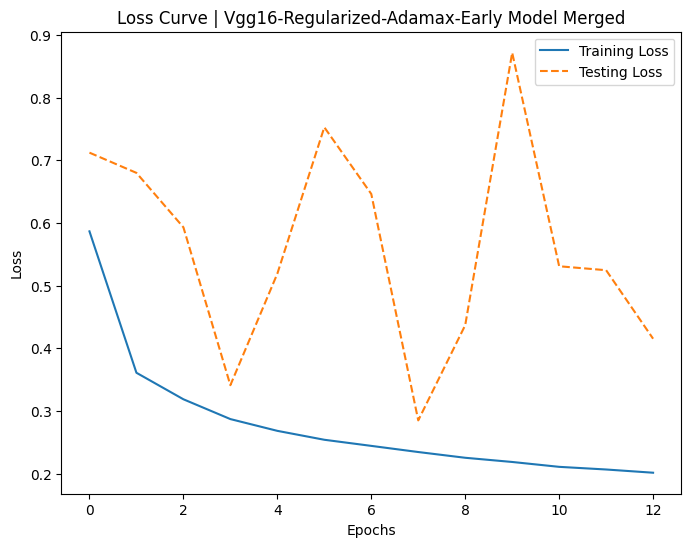

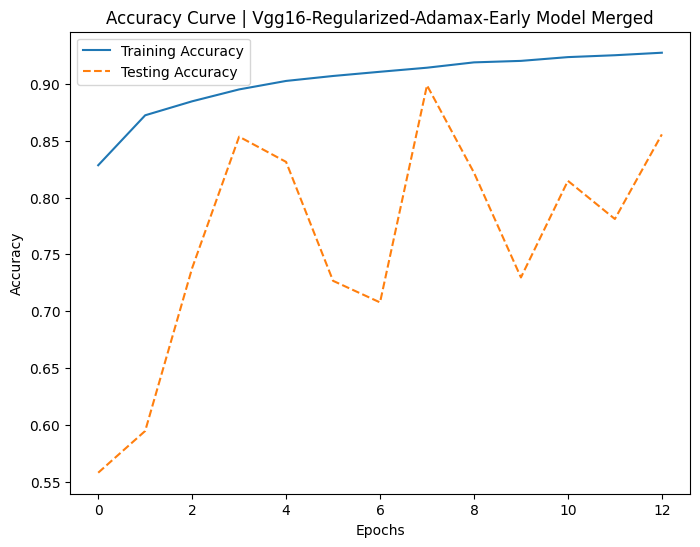

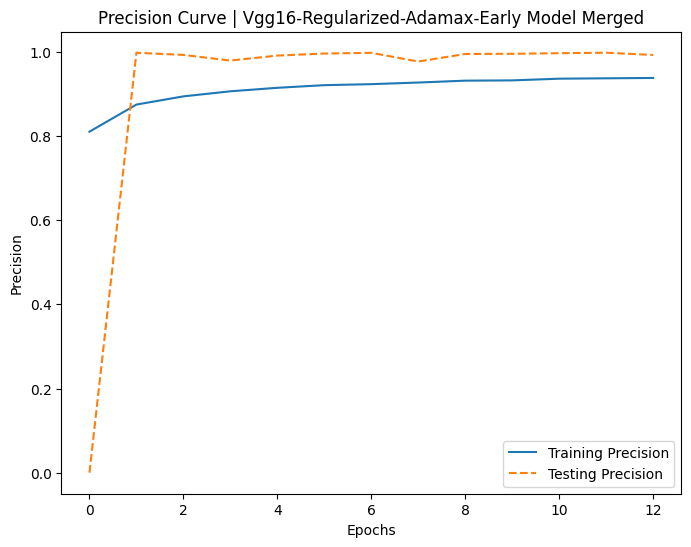

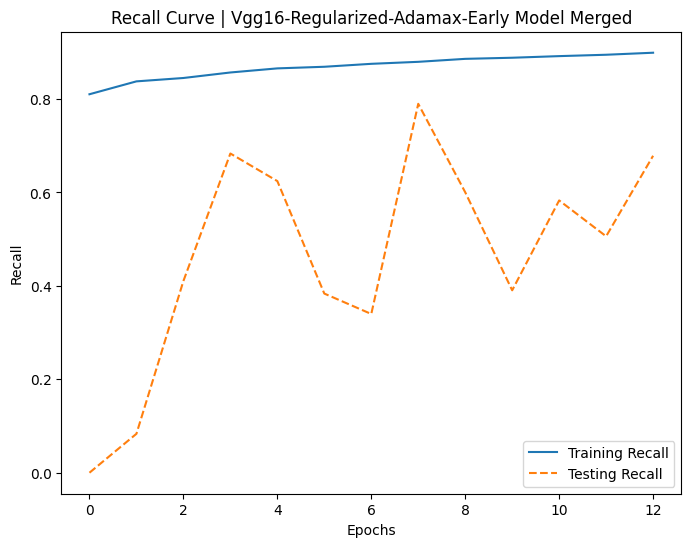

In [12]:
# Plot performance curves
plot_performance_curves(history, model_name)